In [1]:
import pandas as pd
from keras import Sequential
from keras.layers import Conv1D, Conv2D, Dense
from keras.utils import plot_model
from nilmtk import DataSet

UK_DALE = '../../Datasets/UKDALE/ukdale.h5'
END = "1-31-2014"
START = "1-1-2014"
DEVICE = "fridge"
train_building = 1
SAMPLE_PERIOD = 6

dataset = DataSet(UK_DALE)
dataset.set_window(start=START, end=END)
elec = dataset.buildings[train_building].elec
meter = elec.submeters()[DEVICE]
meter_power = meter.power_series(sample_period=SAMPLE_PERIOD)
chunk = next(meter_power)
df_target = pd.DataFrame(chunk)

df = pd.read_csv('jan-2014.csv')
print('Size of features and target {} - {}'.format(len(df), len(df_target)))

Using TensorFlow backend.
/home/christoforos/nilmtk/nilmtk/utils.py:393: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=20)
  data = data.resample(**resample_kwargs)


IOError: File jan-2014.csv does not exist

In [63]:
from keras.layers import Conv1D, Conv2D, Dense, Flatten, Dropout
import numpy as np

def create_model():
    model = Sequential()

    # 1D Conv
    model.add(Conv1D(16, 4, activation="relu", input_shape=(None, 300), padding="same", strides=1))
    model.add(Dropout(0.8))
    model.add(Conv1D(16, 4, activation="relu", input_shape=(None, 300), padding="same", strides=1))
    model.add(Dropout(0.8))
    model.add(Conv1D(16, 4, activation="relu", input_shape=(None, 300), padding="same", strides=1))

    # model.add(Dense(128), activation='relu')

    # # Bi-directional LSTMs
    # model.add(Bidirectional(LSTM(128, return_sequences=True, stateful=False), merge_mode='concat'))
    # model.add(Bidirectional(LSTM(256, return_sequences=False, stateful=False), merge_mode='concat'))

    # Fully Connected Layers
    model.add(Dropout(0.8))
    model.add(Dense(100, activation='relu'))
    
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer='adagrad')
    plot_model(model, to_file='model.png', show_shapes=True)

    return model

# mmax = df_target[:330000].max()
# df_target = df_target / mmax
x_train = df[:330000].values
y_train = df_target[:330000].values
x_test = df[330000:].values
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))


print(x_train)
model = create_model()
model.fit(x_train, y_train, epochs=5, batch_size=256)
pred = model.predict(x_test)

[[[ 0.58635151  0.03933858 -0.90897727 ..., -0.12829399  0.80710274
    0.90949249]]

 [[ 0.          0.          0.         ...,  0.          0.          0.        ]]

 [[ 0.          0.          0.         ...,  0.          0.          0.        ]]

 ..., 
 [[ 0.          0.          0.         ...,  0.          0.          0.        ]]

 [[ 0.          0.          0.         ...,  0.          0.          0.        ]]

 [[ 0.          0.          0.         ...,  0.          0.          0.        ]]]
Epoch 1/5
330000/330000 [==============================] - 9s 26us/step - loss: nan
Epoch 2/5
330000/330000 [==============================] - 8s 23us/step - loss: nan
Epoch 3/5
156672/330000 [=============>................] - ETA: 4s - loss: nan

KeyboardInterrupt: 

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]


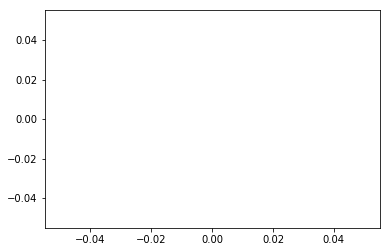

In [62]:
import matplotlib.pyplot as plt
# pred = np.reshape(pred, (pred.shape[0], pred.shape[2]))
print(pred)
plt.plot(pred)
plt.show()